In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

534.2979145631456


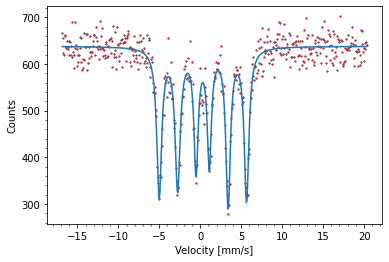

In [48]:
enriched = pd.read_csv("22421b enriched.csv")
enriched = enriched[["Channel", "Counts"]]
enriched = enriched.loc[(enriched["Channel"] < 512)]

def chan2vel(x):
    return (x - 231.59835488)/13.75331683

vel = chan2vel(np.array(enriched["Channel"]))

plt.scatter(vel, enriched["Counts"], s = 1)


def lorentz(x, a1, a2, a3, a4, a5, a6, h1, h2, h3, h4, h5, h6,\
            c1, c2, c3, c4, c5, c6, off):
    s = (a1*h1/((x - c1)**2 + h1**2)) + (a2*h2/((x - c2)**2 + h2**2)) +\
        (a3*h3/((x - c3)**2 + h3**2)) + (a4*h4/((x - c4)**2 + h4**2)) +\
            (a5*h5/((x - c5)**2 + h5**2)) + (a6*h6/((x - c6)**2 + h6**2))
    return 1/np.pi*s + off

lor1result = np.array([7.23615511e+03,  1.01655169e-00, -8.74369242e+00, 1.23363165e+02])
lor2result = np.array([4.55762668e+03,  3.86371983e-01, -2.30118137e+00, 1.18067384e+02])
lor3result = np.array([3.39411420e+03,  3.33236242e-01, -4.96871472e-01, 1.15908488e+02])
lor4result = np.array([2.61224691e+03,  2.20041693e-01,  1.83553668e+00, 1.13542540e+02])
lor5result = np.array([6.38774282e+03,  3.08029910e-01,  3.52447632e+00, 1.21350835e+02])
lor6result = np.array([6.82799841e+03,  4.82222078e-01,  5.56156965e+00, 1.23733385e+02])  
seed = np.array([])
off_seed = 635
amp_seed = np.array([lor1result[0], lor2result[0], lor3result[0], lor4result[0], lor5result[0], lor6result[0]])
seed = np.append(seed, amp_seed)
HWHM_seed = np.array([lor1result[1], lor2result[1], lor3result[1], lor4result[1], lor5result[1], lor6result[1]])
seed = np.append(seed, HWHM_seed)
C_seed = np.array([lor1result[2], lor2result[2], lor3result[2], lor4result[2], lor5result[2], lor6result[2]])
seed = np.append(seed, C_seed)
seed = np.append(seed, off_seed)
x = vel
y_obs = np.array(enriched["Counts"])

popt, pcov = optimize.curve_fit(lorentz, x, y_obs, p0 = seed)
y_fit = lorentz(x, *popt)

plt.plot(x, y_fit)
plt.scatter(x, y_obs, s = 1, color = 'tab:red')
plt.minorticks_on()
plt.xlabel("Velocity [mm/s]")
plt.ylabel("Counts")

chi2_start = np.sum((y_obs - y_fit)**2/y_obs)
print(chi2_start)

676.5409348265499


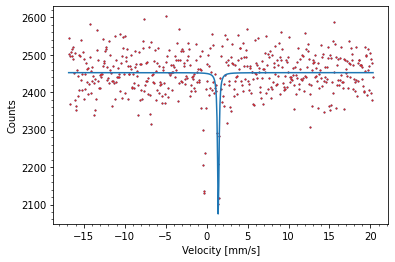

In [66]:
feso4 = pd.read_csv("22421a feso4.csv")
feso4 = feso4[["Channel", "Counts"]]
feso4 = feso4.loc[(feso4["Channel"] < 512)]
def chan2vel(x):
    return (x - 231.59835488)/13.75331683

vel = chan2vel(np.array(feso4["Channel"]))
plt.scatter(vel, feso4["Counts"], s = 1)

def singlelorentz(x, amp, HWHM, C, off):
    return 1/np.pi*amp*HWHM/((x - C)**2 + HWHM**2) + off

seed = [-4.48166406e+04,  3.51852260e+00,  5.7, 1.43200797e+04]
x = vel
y_obs = np.array(feso4["Counts"])
popt1, pcov1 = optimize.curve_fit(singlelorentz, x, y_obs, p0 = seed)
y_fit = singlelorentz(x, *popt1)
plt.plot(x, y_fit,)
plt.scatter(x, y_obs, s = 1, color = 'tab:red')
plt.minorticks_on()
plt.xlabel("Velocity [mm/s]")
plt.ylabel("Counts")
chi2_start = np.sum((y_obs - y_fit)**2/y_obs)
print(chi2_start)

749.3497789318682


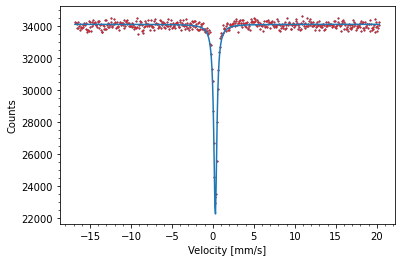

In [65]:
stainless = pd.read_csv("22421d stainless overnight.csv")
stainless = stainless[["Channel", "Counts"]]
stainless = stainless.loc[(stainless["Channel"] < 512)]
def chan2vel(x):
    return (x - 231.59835488)/13.75331683

vel = chan2vel(np.array(stainless["Channel"]))
plt.scatter(vel, stainless["Counts"], s = 1)

def singlelorentz(x, amp, HWHM, C, off):
    return 1/np.pi*amp*HWHM/((x - C)**2 + HWHM**2) + off

seed = [-4.6873986e+04,  3.81769960e+00,  5.7, 1.27834968e+04]
x = vel
y_obs = np.array(stainless["Counts"])
popt1, pcov1 = optimize.curve_fit(singlelorentz, x, y_obs, p0 = seed)
y_fit = singlelorentz(x, *popt1)
plt.plot(x, y_fit,)
plt.scatter(x, y_obs, s = 1, color = 'tab:red')
plt.minorticks_on()
plt.xlabel("Velocity [mm/s]")
plt.ylabel("Counts")
chi2_start = np.sum((y_obs - y_fit)**2/y_obs)
print(chi2_start)